<a href="https://www.kaggle.com/code/samithsachidanandan/perceptron-from-scratch-in-python?scriptVersionId=271461113" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Perceptron Algorithm

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function that can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

Perceptron Algorithm is one of the earliest and most fundamental algorithms in the field of machine learning that has laid the foundation for many more complex and sophisticated algorithms that have been developed over the years. Understanding Perceptron is really important especially if you are getting started with Deep Learning and Neural Networks since it is one of the basic building blocks of Neural Networks. 



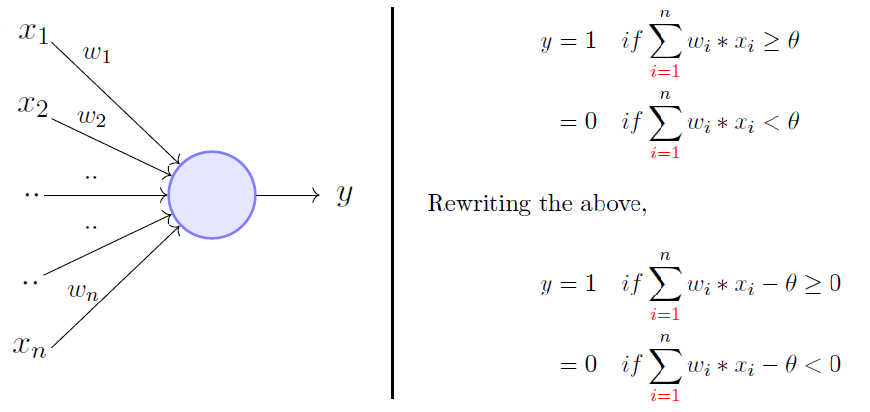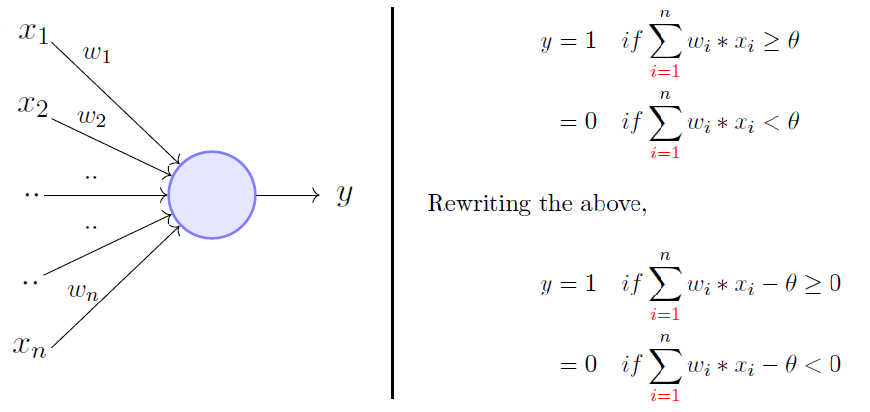

so in simple terms a Perceptron is a single-layer artificial neuron that separates input data into two classes using a linear decision boundary

### Importing the Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets



### Perceptron Class Implementation

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

### Testing

Perceptron classification accuracy 1.0


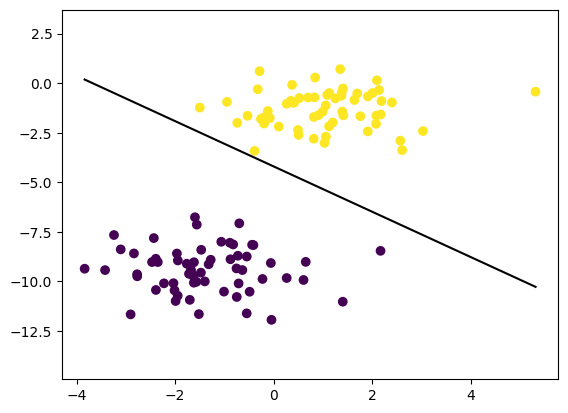

In [3]:

if __name__ == "__main__":
    

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

In [4]:
from sklearn.datasets import load_iris

iris = load_iris() 

In [5]:
from sklearn.model_selection import train_test_split

X = iris.data[:, (0, 1)] 
y = (iris.target == 0).astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [6]:
p = Perceptron(learning_rate=0.001, n_iters=100)

p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


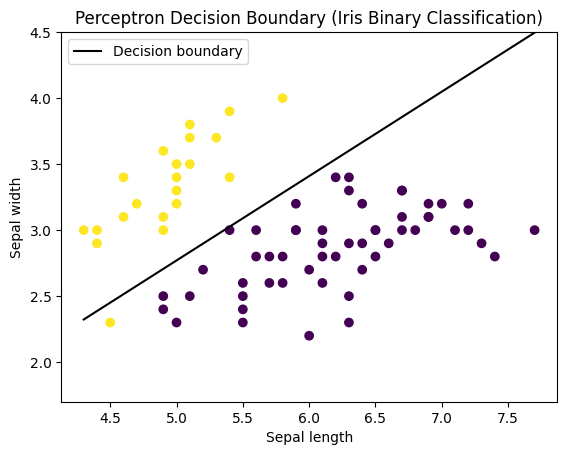

In [7]:
fig, ax = plt.subplots()
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train, cmap="viridis")

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Decision boundary")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 0.5, ymax + 0.5])
ax.legend()
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Perceptron Decision Boundary (Iris Binary Classification)")
plt.show()